In [3]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [5]:
aap1 = pd.read_csv('./data/apple.csv').set_index('Date')
aap1['logReturn'] = np.log(aap1['Close']).shift(-1) - np.log(aap1['Close'])

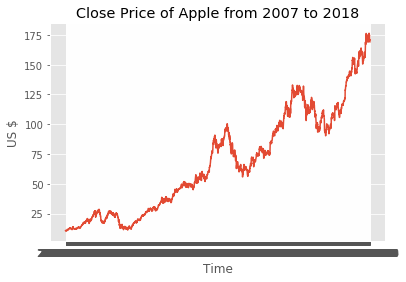

In [6]:
plt.title('Close Price of Apple from 2007 to 2018')
plt.xlabel("Time")
plt.ylabel("US $")
plt.plot(aap1.loc[:,'Close']);

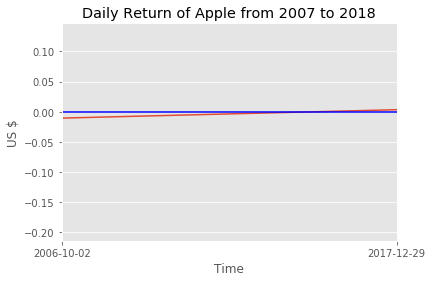

In [10]:
plt.title("Daily Return of Apple from 2007 to 2018")
plt.xlabel("Time")
plt.ylabel("US $")
plt.xlim(aap1.index[0], aap1.index[-1])
plt.plot(aap1.loc[:,'logReturn']);
plt.axhline(0,color='blue');

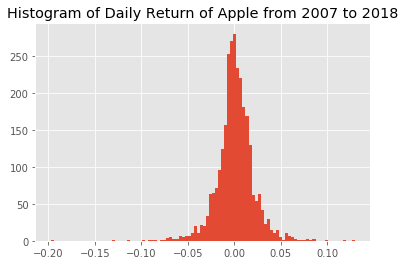

In [11]:
plt.title('Histogram of Daily Return of Apple from 2007 to 2018')
aap1.loc[:, 'logReturn'].dropna().hist(bins=100);

## Setting hypothesis (Two tails test)

1. Null hypothesis $\rightarrow$ $H_{0}: \mu = 0$
2. Alternative hypothesis $\rightarrow$ $H_{a}: \mu \neq 0$

### Given $H_{0}$ is correct:<br/>
$\mid\bar{x} - \mu\mid \rightarrow$ Not very large 

### Standardization $\hat{z}$ ~ $N(0,1)$ <br/><br/>
$$\hat{z} = \frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt{n}}}$$
Kalau $\hat{z}$ jauh dari 0, kita tolak null.<br/><br/>
Biasanya kita ngetes hipotesis awal pasti kalo $\bar{x}$ deket nol.<br/><br/>
Tapi ~~Population sd~~ = Sample sd, jd dari Z-distrib ke t-distrib<br/><br/>
$$\hat{t} = \frac {\bar{x} - \mu}{s/\sqrt{n}} $$

In [19]:
xbar = aap1['logReturn'].mean()
s = aap1['logReturn'].std(ddof=1)
n = aap1['logReturn'].shape[0]
zhat = (xbar-0)/(s/n**0.5) # kita set mu = 0 karena asumsinya null hypothesis benar
print(zhat)

2.5896661841029576


## Set Decision Criteria<br/>
At $\alpha = 5\%$, reject $H_{0}$ if $\hat{z} > 1.96$ or $\hat{z} < -1.96$

In [20]:
alpha = 0.05
zleft = norm.ppf(alpha/2, 0,1)
zright = -zleft
print(zleft, zright)
print('At the significance level of ', alpha)
print('Shall we reject?: ', zhat > zright or zhat < zleft)

-1.9599639845400545 1.9599639845400545
At the significance level of  0.05
Shall we reject?:  True


## Hypothesis for one tail test

1. Null hypothesis $\rightarrow$ $H_{0} \leq 0$
2. Alternative hypothesis $\rightarrow$ $H_{a} > 0 $

### Set decision criteria

At $\alpha = 5\%$, reject $H_{0}$ if $\hat{z} > z_{\alpha}$

In [21]:
alpha = 0.05
zright = norm.ppf(1-alpha,0,1)
print(zleft, zright)
print('At the significance level of ', alpha)
print('Shall we reject: ', zhat > zright)

-1.9599639845400545 1.6448536269514722
At the significance level of  0.05
Shall we reject:  True


## p-value of two tail test

P(observation takes extreme value)<br/><br/>
At $\alpha = 5\%$, reject $H_{0}$ if $p-value < \alpha$

In [22]:
alpha = .05
p = 1- (norm.cdf(abs(zhat), 0,1))
print('At the significance level of ', alpha)
print('Shall we reject: ', p < alpha)

At the significance level of  0.05
Shall we reject:  True
